# L2 Regularization : Ridge Regression on Iris Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
irisDataSet = pd.read_csv("iris.csv")
irisDataSet.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


**Drop the first column as it is unwanted**

In [3]:
iris=irisDataSet.drop(labels ="Unnamed: 0" ,axis = 1)
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


**Data Pre-processing**

In [4]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

**Identify the unique elements of the categorical data variable "Species"**

In [5]:
print(irisDataSet['Species'].unique())

['setosa' 'versicolor' 'virginica']


**Count the number of unique elements of the categorical data variable "Species"**

In [6]:
irisDataSet['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

**Label Encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Label.Encoded.Species'] = le.fit_transform(iris.Species)

In [8]:
iris.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label.Encoded.Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0


**Drop the Species column as it is now Label Encoded**

In [9]:
iris=iris.drop("Species",axis = 1)

**Correlation matrix**

In [10]:
# check for highest feature correlation with the target variable
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label.Encoded.Species
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Label.Encoded.Species,0.782561,-0.426658,0.949035,0.956547,1.000000


**Exploratory Data Analysis**

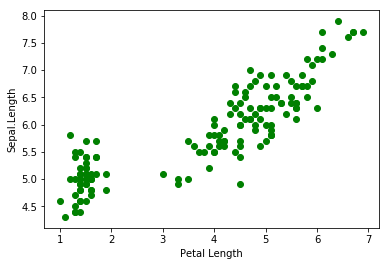

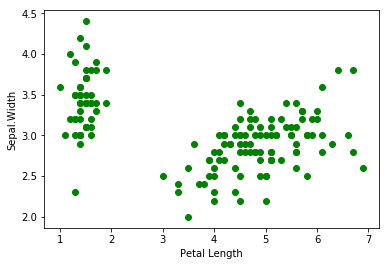

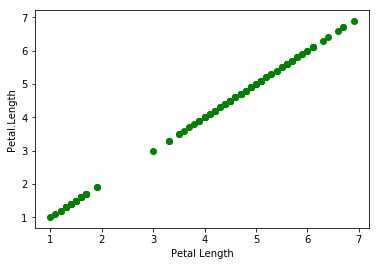

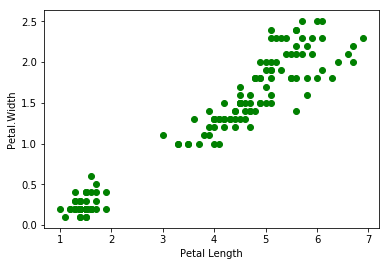

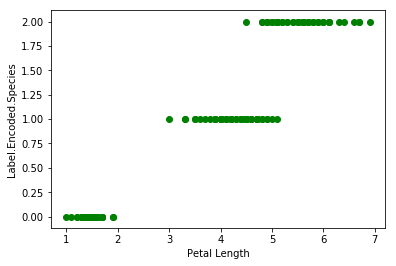

In [11]:
for colNames in iris.columns:
    plt.scatter(iris["Petal.Length"],iris[colNames],color = "green")
    plt.xlabel("Petal Length")
    plt.ylabel(colNames)
    plt.show()

**Prepare the data for sampling**

In [12]:
X = iris[["Sepal.Length","Sepal.Width","Petal.Width","Label.Encoded.Species"]]
Y = iris[["Petal.Length"]]

**Split the data into training and testing sets**

In [13]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 70% : 30%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state=20)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


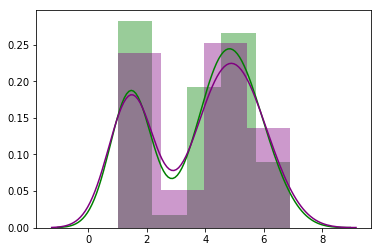

In [14]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

# Multiple Linear Regression

**Train the model using sklearn LinearRegression**

In [15]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
modelMLR = mlr.fit(xtrain, ytrain)

In [16]:
# calculate the coefficient values

b0 = modelMLR.intercept_
b = modelMLR.coef_

print("The value of intercept is %.3f"%b0)
print("The value of coefficients are ",b)

The value of intercept is -0.240
The value of coefficients are  [[ 0.66075779 -0.53730462  1.18065822  0.32881025]]


In [17]:
predictMLR=modelMLR.predict(xtest)

In [18]:
ytest["Predicted"] = predictMLR

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
ytest.head()

,Petal.Length,Predicted,Residual
47,1.4,1.316532,0.083468
73,4.7,4.032059,0.667941
74,4.3,4.294621,0.005379
129,5.8,5.452505,0.347495
67,4.1,3.651430,0.448570


# Ridge Regression

**Create a list of values for shrinkage paramater "alpha" **

In [21]:
tuningParameterList = []
for i in range(0,1000):
    tuningParameterList.append(i*0.0001)
    
tp = {"alpha":tuningParameterList}

**Train the model using sklearn Ridge **

In [22]:
from sklearn.linear_model import Ridge
rr =Ridge()

**Find the best value of shrinkage parameter "alpha" to reduce the model error using cross validation**

In [23]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_squared_error",cv=4)

rrmodel = cv.fit(xtrain,ytrain)
print(rrmodel.best_params_)

{'alpha': 0.0999}


**Evaluate the model with alpha and make predictions**

In [24]:
rr = Ridge(alpha=0.0999)
modelRidge = rr.fit(xtrain,ytrain)
predictRidge = modelRidge.predict(xtest)

In [25]:
ytest["Predicted"] = predictRidge

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
ytest.head()

,Petal.Length,Predicted,Residual
47,1.4,1.318920,0.081080
73,4.7,4.031756,0.668244
74,4.3,4.292642,0.007358
129,5.8,5.463796,0.336204
67,4.1,3.654882,0.445118


**Model Error calculations of Multiple Linear Regression **

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MaeMLR= mean_absolute_error(ytest['Petal.Length'],predictMLR)
print("The mean absolute error of the model is %f"%MaeMLR)

MseMLR=mean_squared_error(ytest['Petal.Length'],predictMLR)
print("The mean squared error of the model is %f"%MseMLR)

The mean absolute error of the model is 0.229372
The mean squared error of the model is 0.090252


**Model Error calculations of Ridge Regression **

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MaeRidge = mean_absolute_error(ytest['Petal.Length'],predictRidge)
print("The mean absolute error of the model is %f"%MaeRidge)

MseRidge=mean_squared_error(ytest['Petal.Length'],predictRidge)
print("The mean squared error of the model is %f"%MseRidge)

The mean absolute error of the model is 0.228647
The mean squared error of the model is 0.089447


**Observation : The Mean absolute  error and Mean squared error of  Ridge Regression is lower than the Multiple Linear Regression**